In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Given the following LP
$\begin{gather*}
\min\quad -x_1 - 4x_2\\
\begin{aligned}
s.a.
2x_1 - x_2  &\geq  0\\
x_1 - 3x_2  &\leq  0 \\
x_1 +  x_2  &\leq  4 \\        
\quad x_1, x_2  & \geq  0 \\
\end{aligned}
\end{gather*}$

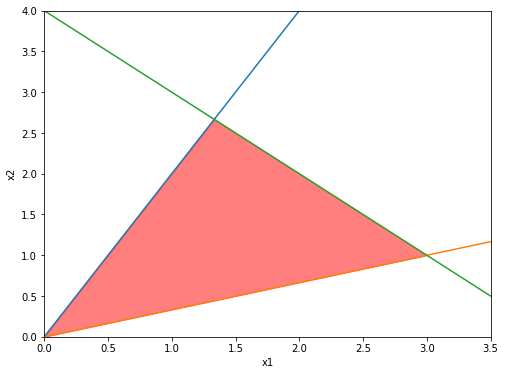

In [0]:
x      = np.linspace(0, 4, 100)
y1 = 2*x
y2 = x/3
y3 = 4 - x
plt.figure(figsize=(8, 6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlim((0, 3.5))
plt.ylim((0, 4))
plt.xlabel('x1')
plt.ylabel('x2')
y5 = np.minimum(y1, y3)
plt.fill_between(x[:-25], y2[:-25], y5[:-25], color='red', alpha=0.5)


### LP in standard form
$\begin{gather*}
\min \quad -x_1 - 4x_2\\
\begin{aligned}
s.a.
2x_1 - x_2 -x_3  &=  0\\
x_1 - 3x_2 +x_4  &=  0 \\
x_1 +  x_2+x_5  &= 4 \\        
\quad x_1, x_2, x_3, x_4, x_5  & \geq  0 \\
\end{aligned}
\end{gather*}$

### We see ($x_1,x_2$)=(1,1) is a interior point so we choose it as initial point x_0

### x_0=$\begin{bmatrix}1\\1\\1\\2\\2\end{bmatrix}$
### A= $\begin{bmatrix}2& -1 & -1 & 0 & 0\\
1& -3 & 0 & 1 & 0\\
1 & 1 & 0 & 0 & 1\\
\end{bmatrix}$
### Initial Solution z=-5

Text(1.05, 1.05, 'x_0')

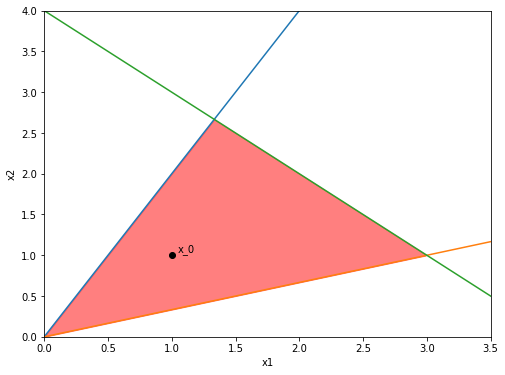

In [0]:
x      = np.linspace(0, 4, 100)
y1 = 2*x
y2 = x/3
y3 = 4 - x
plt.figure(figsize=(8, 6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlim((0, 3.5))
plt.ylim((0, 4))
plt.xlabel('x1')
plt.ylabel('x2')
y5 = np.minimum(y1, y3)
plt.fill_between(x[:-25], y2[:-25], y5[:-25], color='red', alpha=0.5)
plt.scatter([1],[1],color='black')
plt.annotate('x_0',(1.05,1.05))

## Iteration 1

In [0]:
mu       = 100
gamma    = 0.8
A        = np.array([[2,-1,-1,0,0],[1,-3,0,1,0],[1,1,0,0,1]])
X        = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,2,0],[0,0,0,0,2]])
vector_1 = np.ones((5,1))
c        = np.array([[-1],[-4],[0],[0],[0]])

x_0   = np.array([[1],[1],[1],[2],[2]]) #Punto inicial


#RESOLVER ECUACION 4 

#------Lado izquierdo
izq_ec_4 = np.matmul( A, np.matmul( np.power(X,2),A.T ) )

#------Lado derecho
#                     -mu*A*X*1                       +       AX^2c
der_ec_4 = -mu*np.matmul( A,np.matmul( X,vector_1 ) ) + np.matmul( A,np.matmul( np.power(X,2),c ) )

#------Determino dy

dy = np.linalg.solve(izq_ec_4, der_ec_4)

#RESOLVER ECUACION 3

ds = np.matmul(-1*A.T,dy) #ds=-A^T*dy

#RESOLVER ECUACION 1


izq_ec_1 = mu*np.power(np.linalg.inv(X),2) #mu*X^-2

der_ec_1 = mu*np.matmul(np.linalg.inv(X),vector_1)-c-ds #mu*X^-1*1-c-ds

dx       = np.linalg.solve(izq_ec_1,der_ec_1)

#ACTUALIZAR x_0

x_1 = x_0 + dx

Text(1.6794594594594596, 1.6308108108108106, 'x_1')

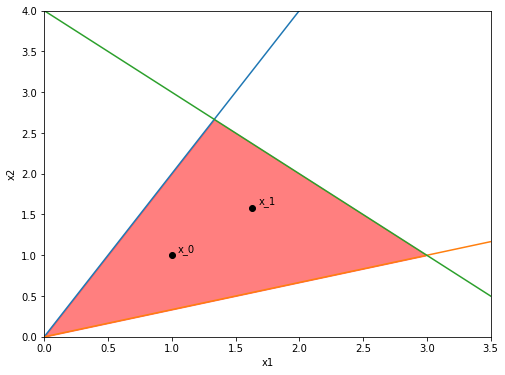

In [0]:
x      = np.linspace(0, 4, 100)
y1 = 2*x
y2 = x/3
y3 = 4 - x
plt.figure(figsize=(8, 6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlim((0, 3.5))
plt.ylim((0, 4))
plt.xlabel('x1')
plt.ylabel('x2')
y5 = np.minimum(y1, y3)
plt.fill_between(x[:-25], y2[:-25], y5[:-25], color='red', alpha=0.5)
plt.scatter([1],[1],color='black')
plt.scatter(x_1[0,0],x_1[1,0],color='black') #graficar x_1
plt.annotate('x_0',(1.05,1.05))
plt.annotate('x_1',(x_1[0,0]+0.05,x_1[1,0]+0.05)) #anotar x_1

## Iteration 2

In [0]:
mu       = mu*gamma
X        = np.array([[x_1[0,0],0,0,0,0],[0,x_1[1,0],0,0,0],
                     [0,0,x_1[2,0],0,0],[0,0,0,x_1[3,0],0],[0,0,0,0,x_1[4,0]]])

#RESOLVER ECUACION 4 

#------Lado izquierdo
izq_ec_4 = np.matmul( A, np.matmul( np.power(X,2),A.T ) )

#------Lado derecho
#                     -mu*A*X*1                       +       AX^2c
der_ec_4 = -mu*np.matmul( A,np.matmul( X,vector_1 ) ) + np.matmul( A,np.matmul( np.power(X,2),c ) )

#------Determino dy

dy = np.linalg.solve(izq_ec_4, der_ec_4)

#RESOLVER ECUACION 3

ds = np.matmul(-1*A.T,dy) #ds=-A^T*dy

#RESOLVER ECUACION 1


izq_ec_1 = mu*np.power(np.linalg.inv(X),2) #mu*X^-2

der_ec_1 = mu*np.matmul(np.linalg.inv(X),vector_1)-c-ds #mu*X^-1*1-c-ds

dx       = np.linalg.solve(izq_ec_1,der_ec_1)

#ACTUALIZAR x_1

x_2 = x_1 + dx

Text(1.7585317120238753, 1.551107772927307, 'x_2')

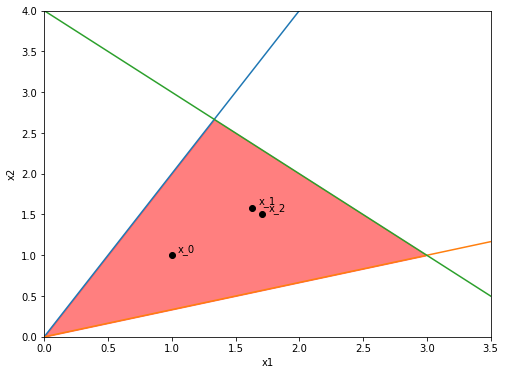

In [0]:
x      = np.linspace(0, 4, 100)
y1 = 2*x
y2 = x/3
y3 = 4 - x
plt.figure(figsize=(8, 6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlim((0, 3.5))
plt.ylim((0, 4))
plt.xlabel('x1')
plt.ylabel('x2')
y5 = np.minimum(y1, y3)
plt.fill_between(x[:-25], y2[:-25], y5[:-25], color='red', alpha=0.5)
plt.scatter([1],[1],color='black')
plt.scatter(x_1[0,0],x_1[1,0],color='black') #graficar x_1
plt.scatter(x_2[0,0],x_2[1,0],color='black') #graficar x_2
plt.annotate('x_0',(1.05,1.05))
plt.annotate('x_1',(x_1[0,0]+0.05,x_1[1,0]+0.05)) #anotar x_1
plt.annotate('x_2',(x_2[0,0]+0.05,x_2[1,0]+0.05)) #anotar x_2

### Now lets write a function to run $n$ iterations

In [0]:
mu       = 100
gamma    = 0.8
A        = np.array([[2,-1,-1,0,0],[1,-3,0,1,0],[1,1,0,0,1]])
vector_1 = np.ones((5,1))
c        = np.array([[-1],[-4],[0],[0],[0]])

x        = np.array([[1],[1],[1],[2],[2]]) #Punto inicial

x1s      = [] #Lista vacia para guardar x_1's
x2s      = [] #Lista vacia para guardar x_2's
x1s.append(x[0,0])
x2s.append(x[1,0])

for iteracion in range(100):
  
  X = np.array([[x[0,0],0,0,0,0],[0,x[1,0],0,0,0],
                [0,0,x[2,0],0,0],[0,0,0,x[3,0],0],[0,0,0,0,x[4,0]]])
  #RESOLVER ECUACION 4 

  #------Lado izquierdo
  izq_ec_4 = np.matmul( A, np.matmul( np.power(X,2),A.T ) )

  #------Lado derecho
  #                     -mu*A*X*1                       +       AX^2c
  der_ec_4 = -mu*np.matmul( A,np.matmul( X,vector_1 ) ) + np.matmul( A,np.matmul( np.power(X,2),c ) )

  #------Determino dy

  dy = np.linalg.solve(izq_ec_4, der_ec_4)

  #RESOLVER ECUACION 3

  ds = np.matmul(-1*A.T,dy) #ds=-A^T*dy

  #RESOLVER ECUACION 1

  izq_ec_1 = mu*np.power(np.linalg.inv(X),2) #mu*X^-2

  der_ec_1 = mu*np.matmul(np.linalg.inv(X),vector_1)-c-ds #mu*X^-1*1-c-ds

  dx       = np.linalg.solve(izq_ec_1,der_ec_1)

  #ACTUALIZAR vector x

  x  = x + dx
  mu = mu*gamma
  x1s.append( x[0,0] )
  x2s.append( x[1,0] )
  

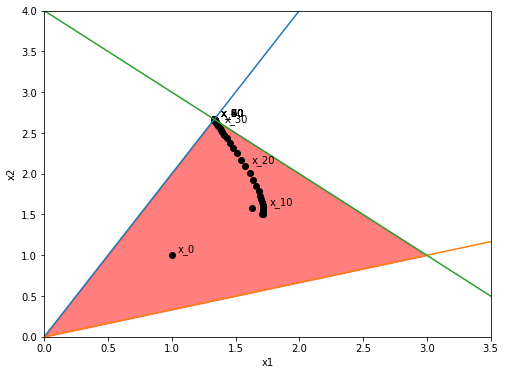

In [0]:
x  = np.linspace(0, 4, 100)
y1 = 2*x
y2 = x/3
y3 = 4 - x
plt.figure(figsize=(8, 6))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xlim((0, 3.5))
plt.ylim((0, 4))
plt.xlabel('x1')
plt.ylabel('x2')
y5 = np.minimum(y1, y3)
plt.fill_between(x[:-25], y2[:-25], y5[:-25], color='red', alpha=0.5)

for iteracion in range(100):
  plt.scatter(x1s[iteracion],x2s[iteracion],color='black')
  if iteracion % 10 == 0:
    nombre = 'x_'+str(iteracion)
    plt.annotate(nombre,(x1s[iteracion]+0.05,x2s[iteracion]+0.05))